⚠️ Found NaNs in features. Filling with median...
⚠️ NaNs detected AFTER scaling. Replacing with 0...


c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


✅ SUCCESS: Logistic Regression model trained.

✅ Logistic Regression Accuracy: 0.9908

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       311
           1       0.97      0.97      0.97       222
           2       0.99      0.99      0.99       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       0.99      1.00      0.99       825
           6       0.99      0.98      0.99      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.99      1.00      0.99       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



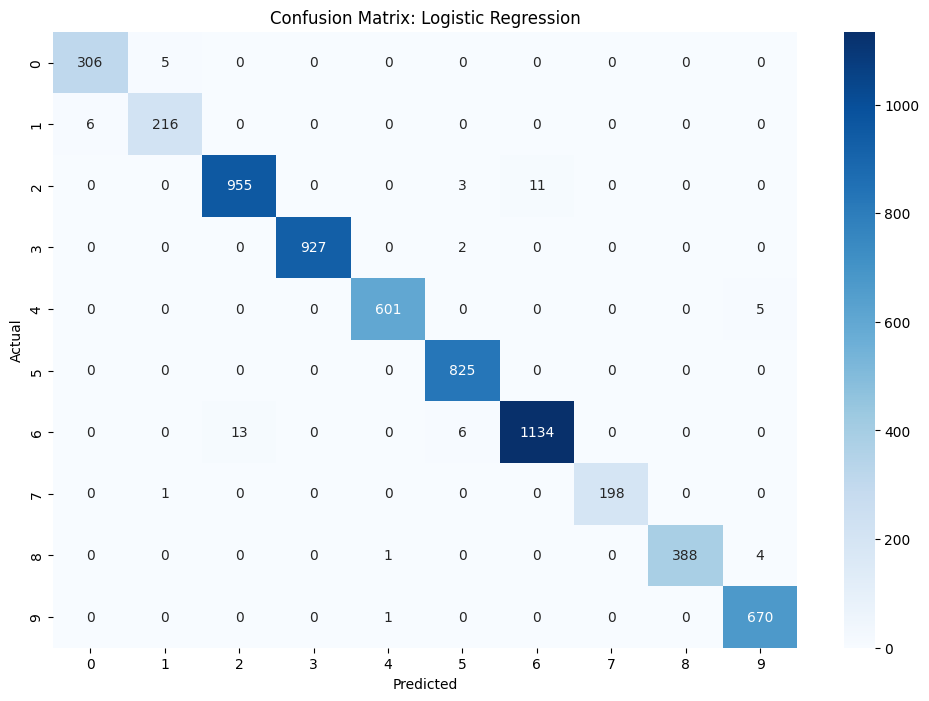

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_38068\3550869114.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


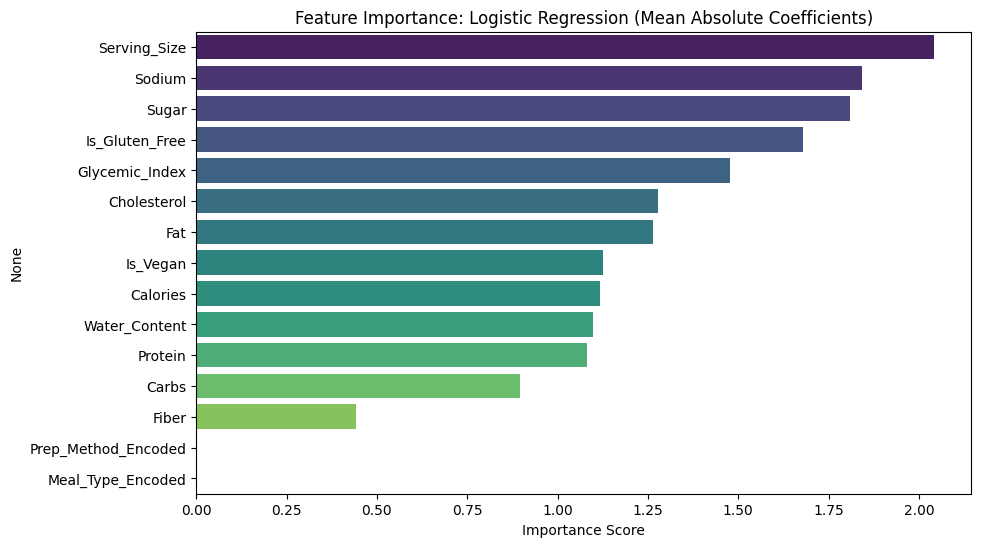

In [15]:
# A. Logistic Regression ML model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding categorical text to numbers (Mapping)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# Encode the Target (Food Names)
le = LabelEncoder()
# Ensure no NaNs in the target column before encoding
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features (X) and Target (y)
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. CRITICAL FIX: Handle NaNs before Scaling
# This catches any NaNs created by mapping errors or missing data
if X.isnull().values.any():
    print("⚠️ Found NaNs in features. Filling with median...")
    X = X.fillna(X.median())

# 5. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Safety check: Replace any NaNs generated by the scaler (happens if variance is 0)
if np.isnan(X_scaled).any():
    print("⚠️ NaNs detected AFTER scaling. Replacing with 0...")
    X_scaled = np.nan_to_num(X_scaled)

# 6. Split the Data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 7. Train Logistic Regression
# solver='lbfgs' is robust; max_iter=1000 ensures convergence
try:
    lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
    lr_model.fit(X_train_scaled, y_train)
    print("✅ SUCCESS: Logistic Regression model trained.")
except ValueError as e:
    print(f"❌ Error during training: {e}")

# 8. Predictions & Evaluation
y_pred = lr_model.predict(X_test_scaled)

print(f"\n✅ Logistic Regression Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 9. Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 10. FEATURE IMPORTANCE (Coefficients)
# We take the mean of absolute coefficients across all classes
importance = np.mean(np.abs(lr_model.coef_), axis=0)
feat_importance = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')
plt.title('Feature Importance: Logistic Regression (Mean Absolute Coefficients)')
plt.xlabel('Importance Score')
plt.show()

✅ Decision Tree Accuracy: 0.9884

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       311
           1       0.98      0.98      0.98       222
           2       0.97      0.98      0.97       969
           3       1.00      1.00      1.00       929
           4       0.98      1.00      0.99       606
           5       1.00      1.00      1.00       825
           6       0.98      0.98      0.98      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      1.00       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



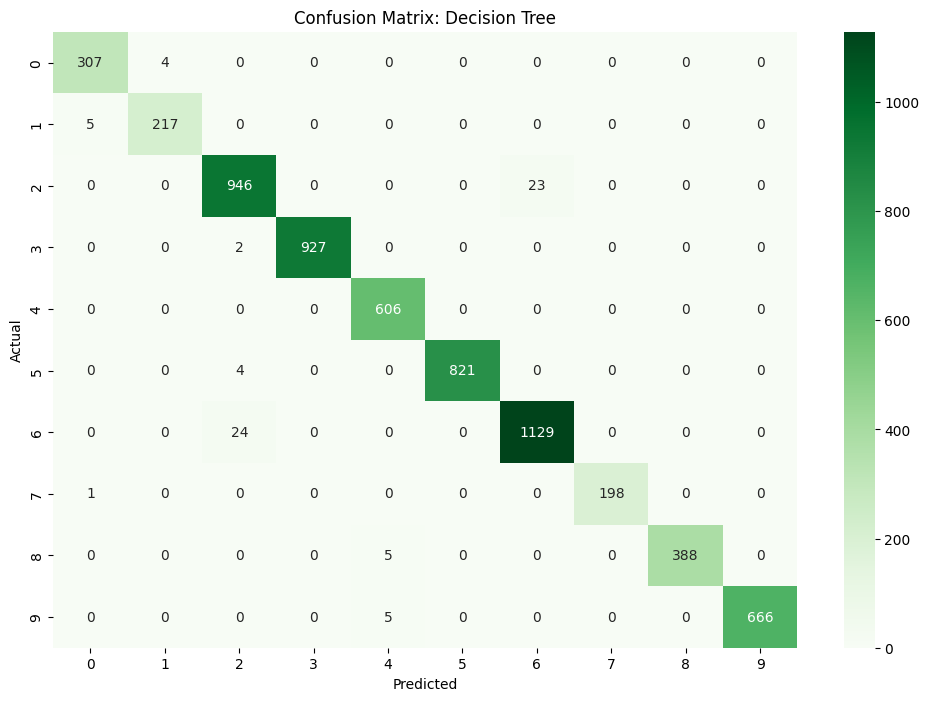

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_38068\1215864005.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='coolwarm')


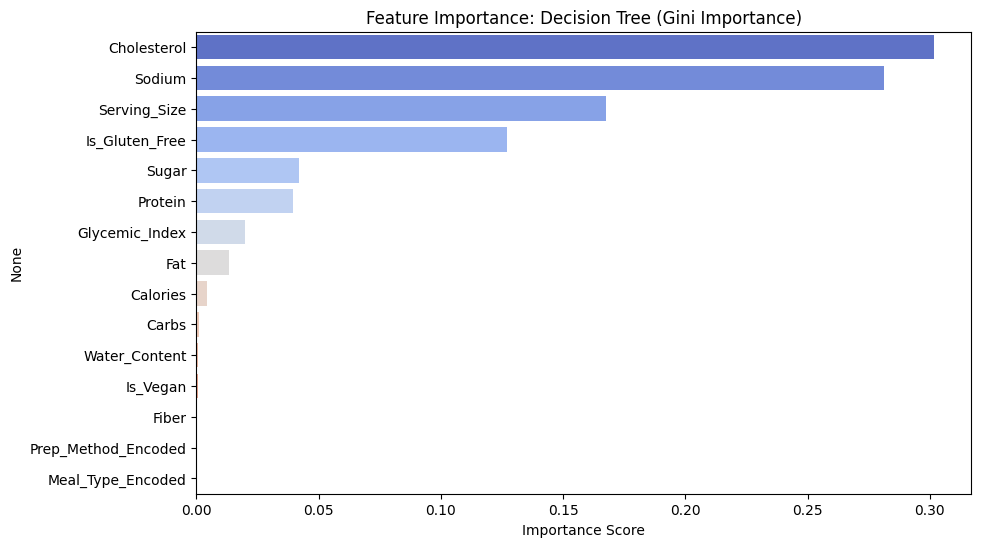

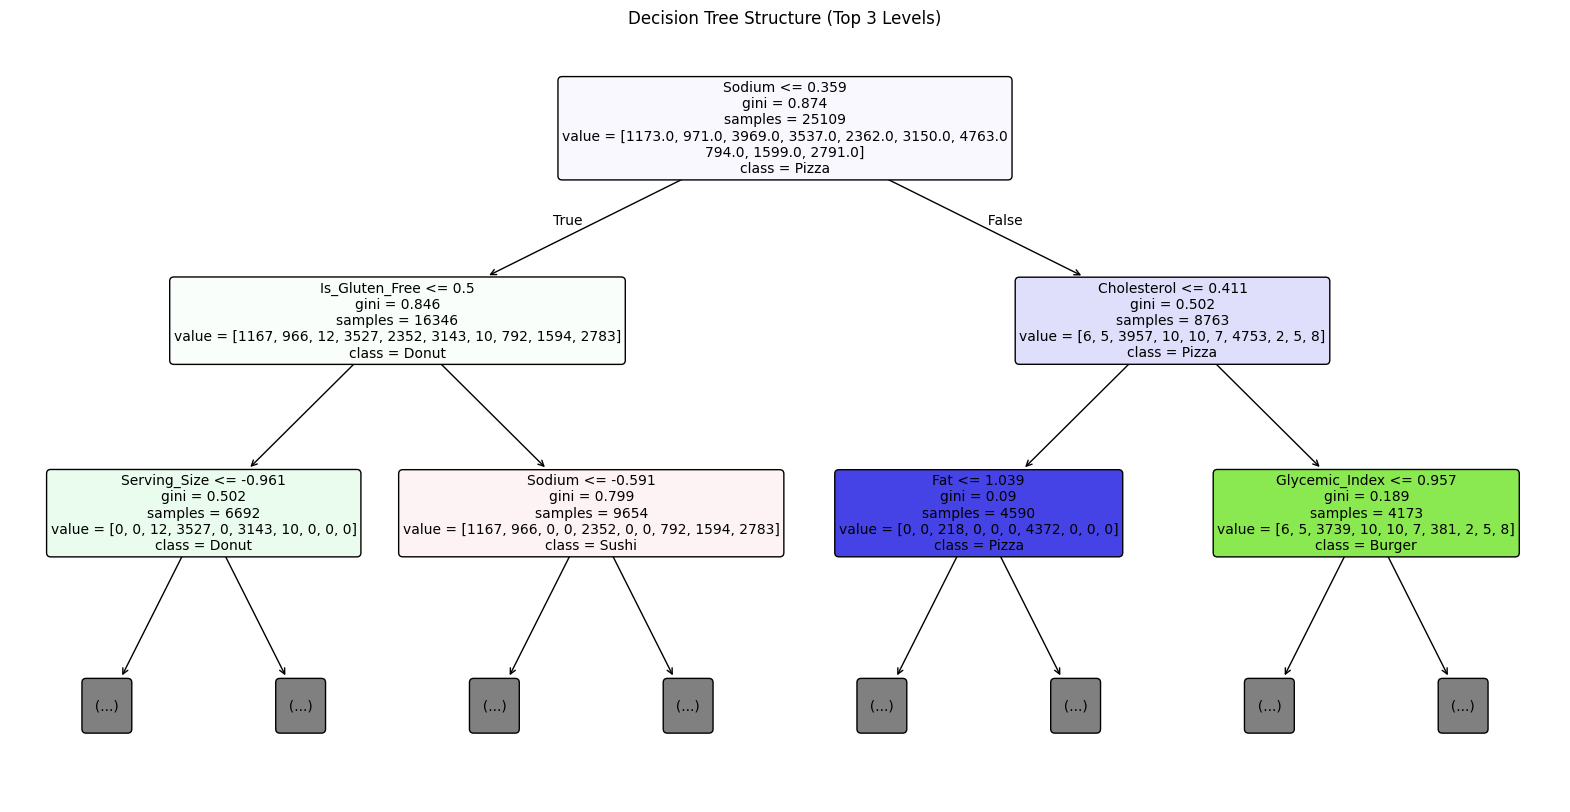

In [ ]:
# B. Decision Tree ML Model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding categorical text to numbers (Mapping)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# Encode the Target (Food Names)
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features (X) and Target (y)
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs (Decision Trees in sklearn still require this)
X = X.fillna(X.median())

# 5. Split the Data (No Scaling needed for Trees!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Decision Tree
# random_state ensures you get the same importance scores every time you run it
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = dt_model.predict(X_test)

print(f"✅ Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix: Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9. FEATURE IMPORTANCE
# Decision Trees give a built-in importance score based on Gini Importance
importances = dt_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='coolwarm')
plt.title('Feature Importance: Decision Tree (Gini Importance)')
plt.xlabel('Importance Score')
plt.show()

# 10. OPTIONAL: Visualizing the Tree (First 3 levels only)
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, class_names=list(le.classes_), 
          max_depth=2, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure (Top 3 Levels)")
plt.show()

✅ Random Forest Accuracy: 0.9928

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       311
           1       1.00      0.99      1.00       222
           2       0.98      0.99      0.98       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.99      0.99      0.99      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.99      1.00      0.99       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



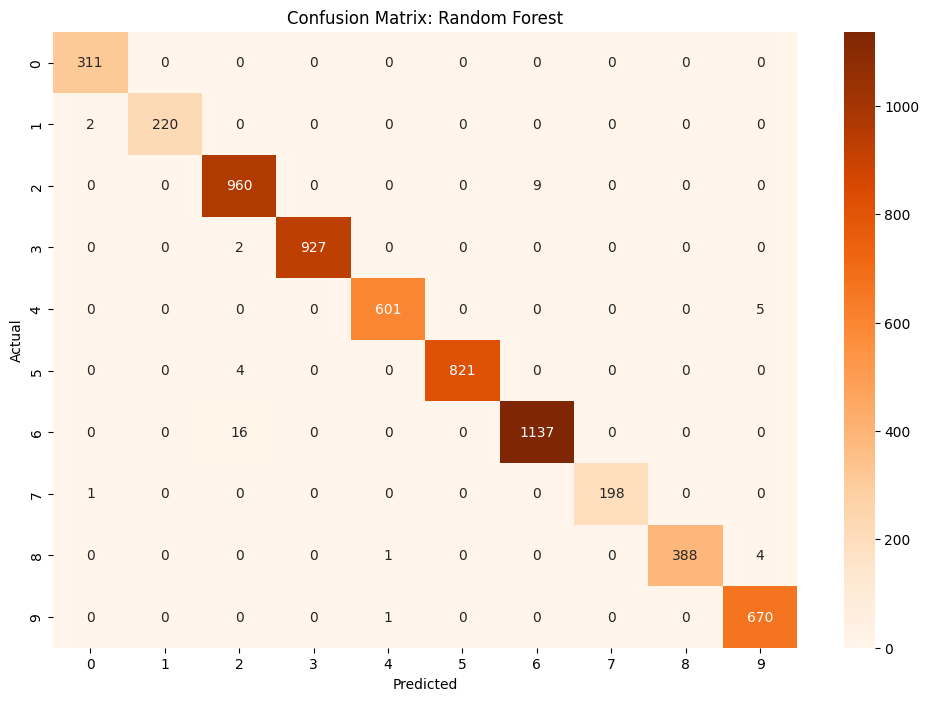

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_38068\74942474.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='autumn')


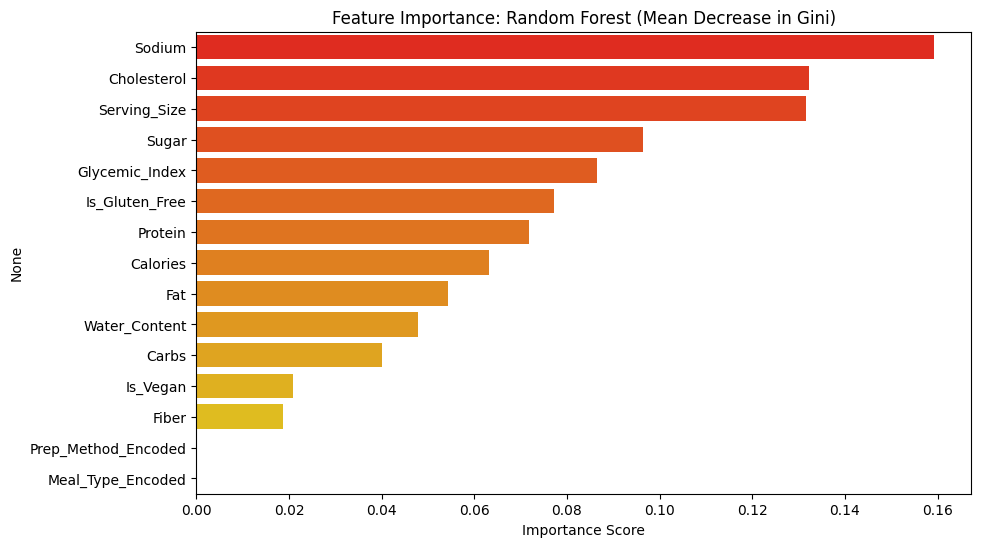

In [16]:
# C. Random Forest ML modeL:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding categorical text to numbers (Mapping)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# Encode the Target (Food Names)
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features (X) and Target (y)
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs
X = X.fillna(X.median())

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train Random Forest
# n_estimators=100 means we are building 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = rf_model.predict(X_test)

print(f"✅ Random Forest Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 9. FEATURE IMPORTANCE (The core of your analysis!)
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='autumn')
plt.title('Feature Importance: Random Forest (Mean Decrease in Gini)')
plt.xlabel('Importance Score')
plt.show()

c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


⚠️ NaNs detected after scaling. Replacing with 0...

✅ KNN Accuracy: 0.9916

--- Classification Report (Precision, Recall, F1) ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       311
           1       0.99      0.97      0.98       222
           2       0.99      0.98      0.99       969
           3       1.00      1.00      1.00       929
           4       0.98      1.00      0.99       606
           5       0.99      1.00      0.99       825
           6       0.99      0.99      0.99      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       1.00      0.99      1.00       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



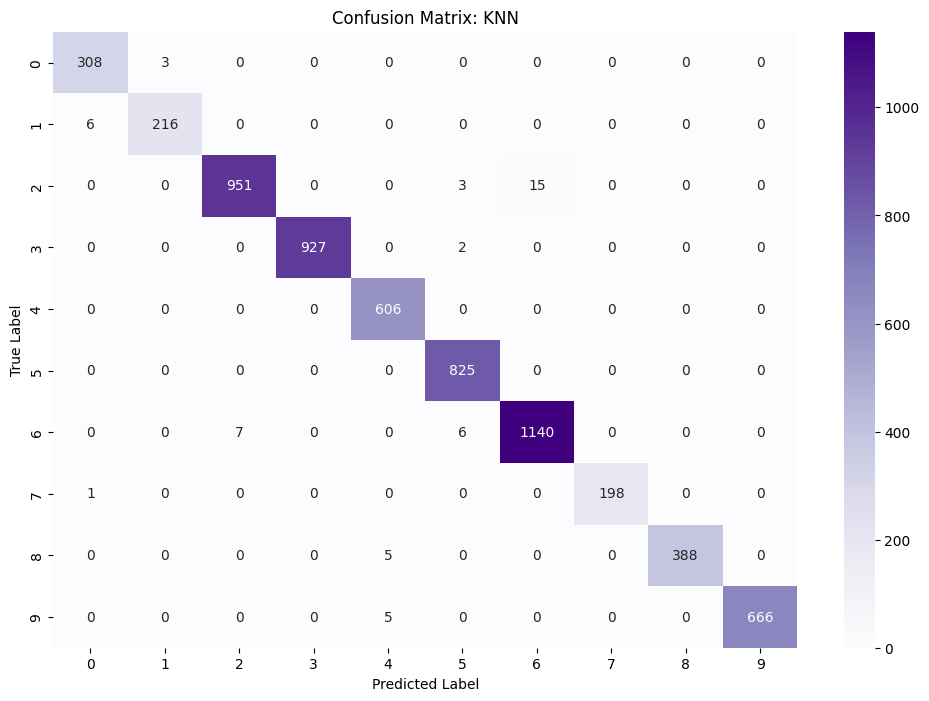

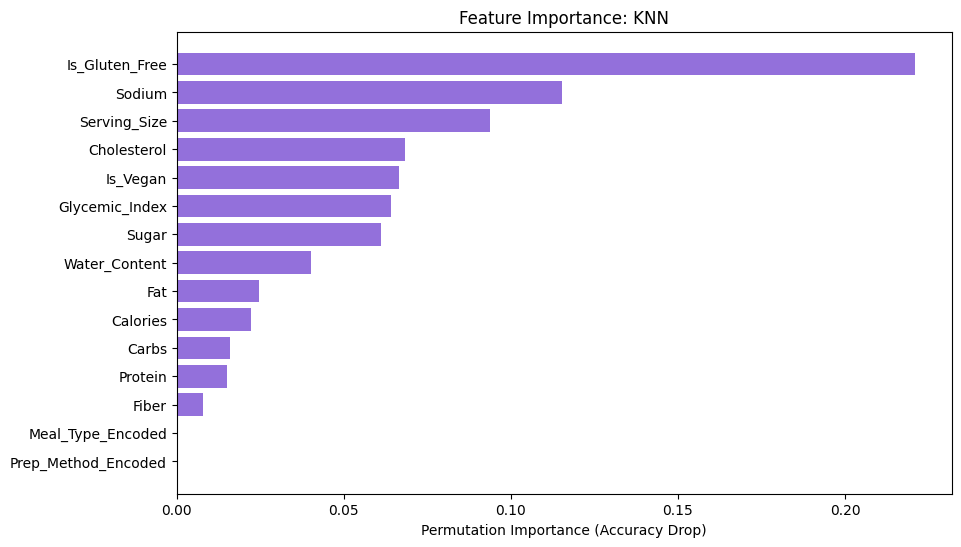

In [19]:
# D. K-Nearest Neighbors ML model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding (Same mappings as previous models)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features and Target
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs & Scaling (MANDATORY for KNN)
X = X.fillna(X.median()) # Pre-scaling fill

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- THE CRITICAL FIX FOR VALUEERROR ---
# If a column has zero variance, StandardScaler produces NaNs. We replace them with 0.
if np.isnan(X_scaled).any():
    print("⚠️ NaNs detected after scaling. Replacing with 0...")
    X_scaled = np.nan_to_num(X_scaled)

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Train KNN
# k=5 is a good balance between bias and variance
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = knn_model.predict(X_test)

print(f"\n✅ KNN Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report (Precision, Recall, F1) ---")
# 'weighted' accounts for class imbalance in your food labels
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix: KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 9. FEATURE IMPORTANCE (Permutation Importance)
# This shuffles each feature and measures the drop in accuracy
perm_importance = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42)

# Sort and Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='mediumpurple')
plt.xlabel("Permutation Importance (Accuracy Drop)")
plt.title("Feature Importance: KNN")
plt.show()

c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1207: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1212: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\extmath.py:1236: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



✅ SVM Accuracy: 0.9927

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       311
           1       1.00      0.98      0.99       222
           2       0.99      0.99      0.99       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       0.99      1.00      0.99       825
           6       0.99      0.99      0.99      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.99      1.00      0.99       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



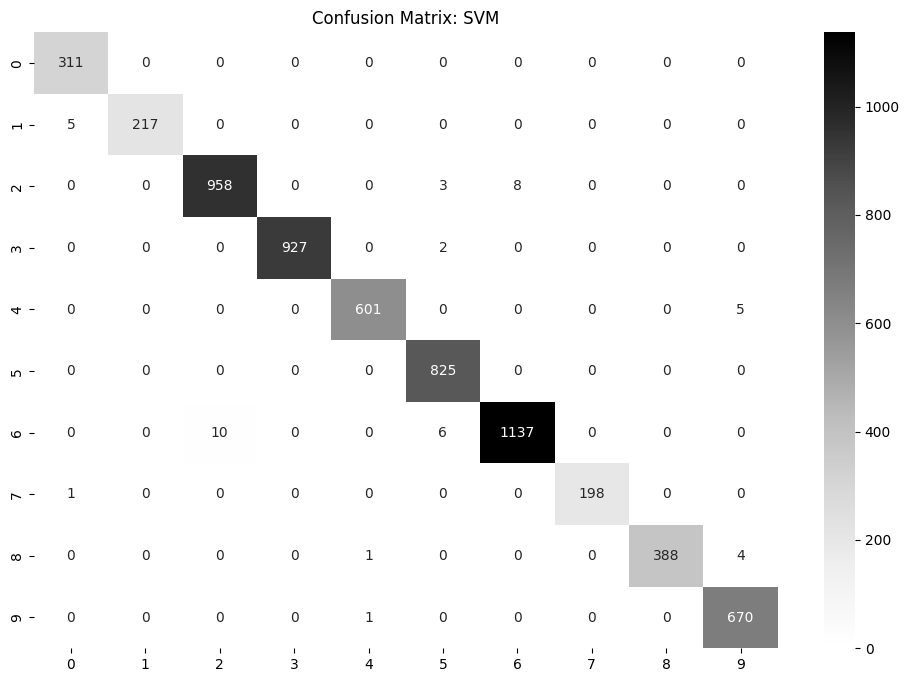

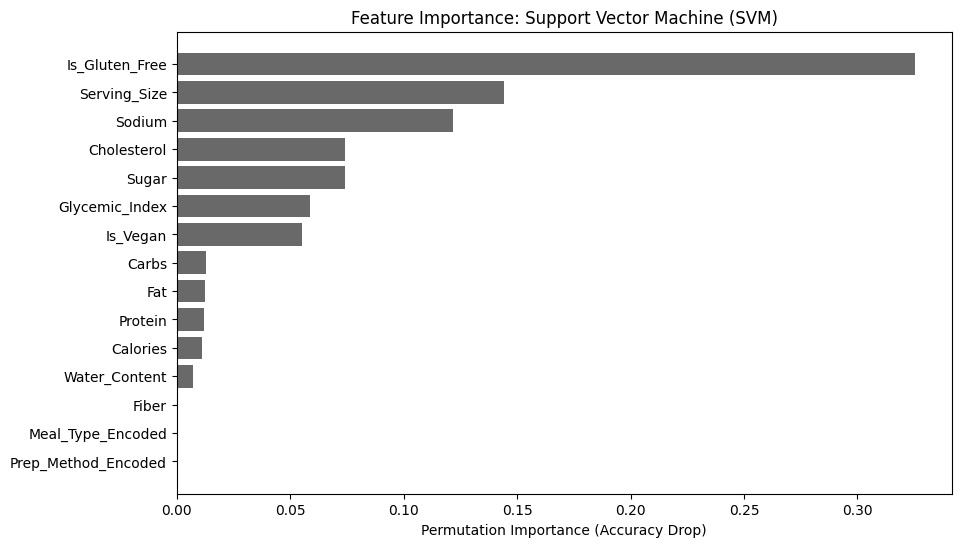

In [ ]:
# E. Support Vector Machine ML model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding (Same as previous steps)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features and Target
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs & Scaling (MANDATORY for SVM)
X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Safety Fix: Replace any NaNs generated by scaling zero-variance columns
if np.isnan(X_scaled).any():
    X_scaled = np.nan_to_num(X_scaled)

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 6. Train SVM
# 'C' controls the margin; 'gamma' controls the reach of a single training example
# kernel='rbf' is best for non-linear nutrition data
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = svm_model.predict(X_test)

print(f"\n✅ SVM Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix: SVM')
plt.show()

# 9. FEATURE IMPORTANCE (Permutation Importance)
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=5, random_state=42)

# Sort and Plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='dimgray')
plt.xlabel("Permutation Importance (Accuracy Drop)")
plt.title("Feature Importance: Support Vector Machine (SVM)")
plt.show()

c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:42:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Accuracy: 0.9925

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       311
           1       1.00      0.99      0.99       222
           2       0.98      0.99      0.98       969
           3       1.00      1.00      1.00       929
           4       1.00      0.99      0.99       606
           5       1.00      1.00      1.00       825
           6       0.99      0.99      0.99      1153
           7       1.00      0.99      1.00       199
           8       1.00      0.99      0.99       393
           9       0.99      1.00      0.99       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



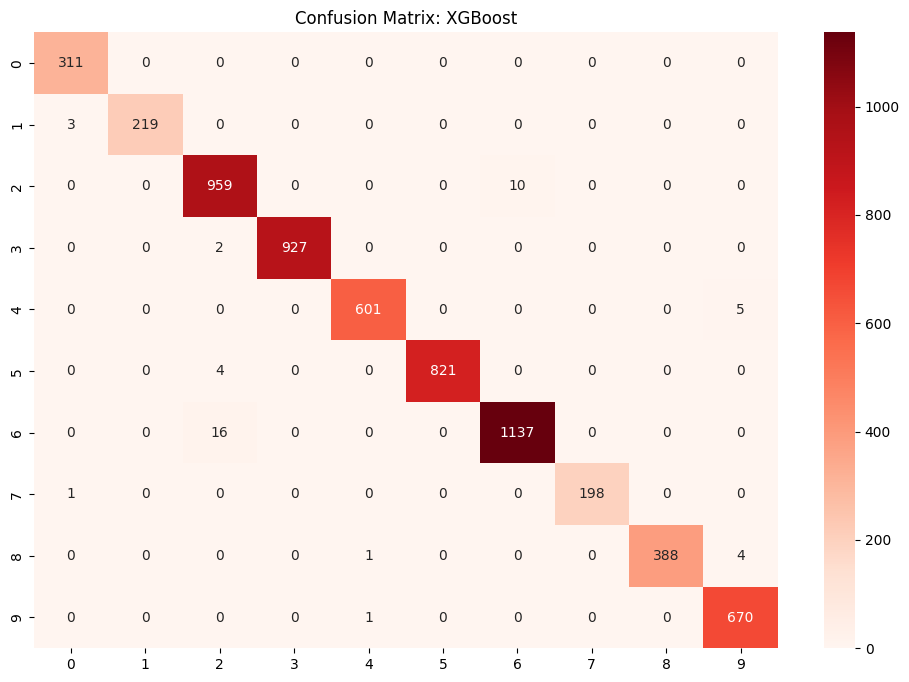

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_38068\2669239120.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='flare')


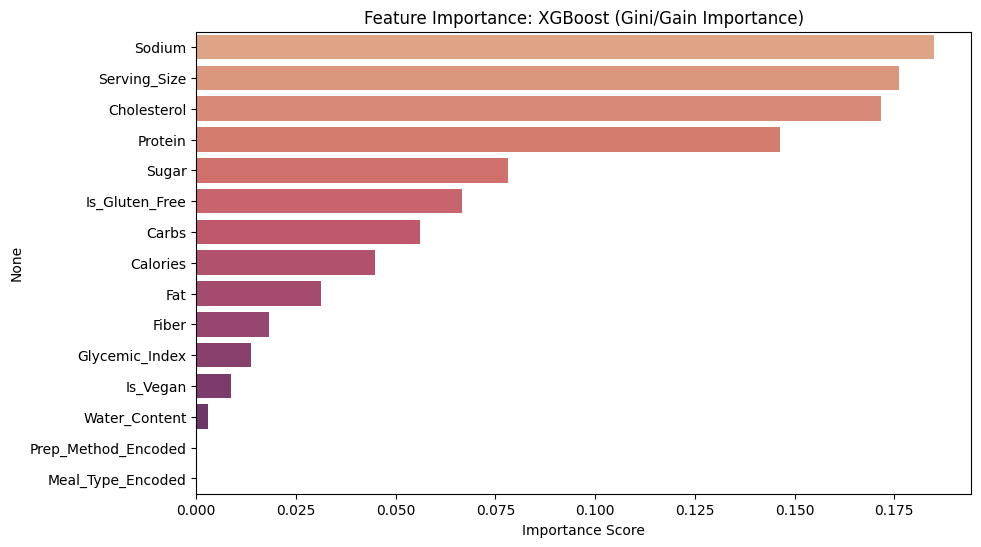

In [22]:
# F. XGBoost ML model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Encoding categorical text (Mappings)
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# Encode the Target (Food Names)
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features and Target
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs (Optional for XGBoost but good for consistency)
X = X.fillna(X.median())

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train XGBoost
# use_label_encoder=False is used for newer versions of XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=6, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = xgb_model.predict(X_test)

print(f"\n✅ XGBoost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 8. Confusion Matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix: XGBoost')
plt.show()

# 9. FEATURE IMPORTANCE (Weight/Gain)
# XGBoost provides multiple importance types; 'gain' is the most informative
importances = xgb_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='flare')
plt.title('Feature Importance: XGBoost (Gini/Gain Importance)')
plt.xlabel('Importance Score')
plt.show()

🚀 Training Gradient Boosting Model...

✅ Model Accuracy: 0.9916

--- Classification Report ---
              precision    recall  f1-score   support

       Apple       0.99      0.99      0.99       311
      Banana       0.99      0.99      0.99       222
      Burger       0.99      0.99      0.99       969
       Donut       0.99      1.00      1.00       929
   Ice Cream       0.99      0.99      0.99       606
       Pasta       0.99      1.00      0.99       825
       Pizza       0.99      0.99      0.99      1153
       Salad       0.99      0.99      0.99       199
       Steak       0.99      0.99      0.99       393
       Sushi       0.99      1.00      0.99       671

    accuracy                           0.99      6278
   macro avg       0.99      0.99      0.99      6278
weighted avg       0.99      0.99      0.99      6278



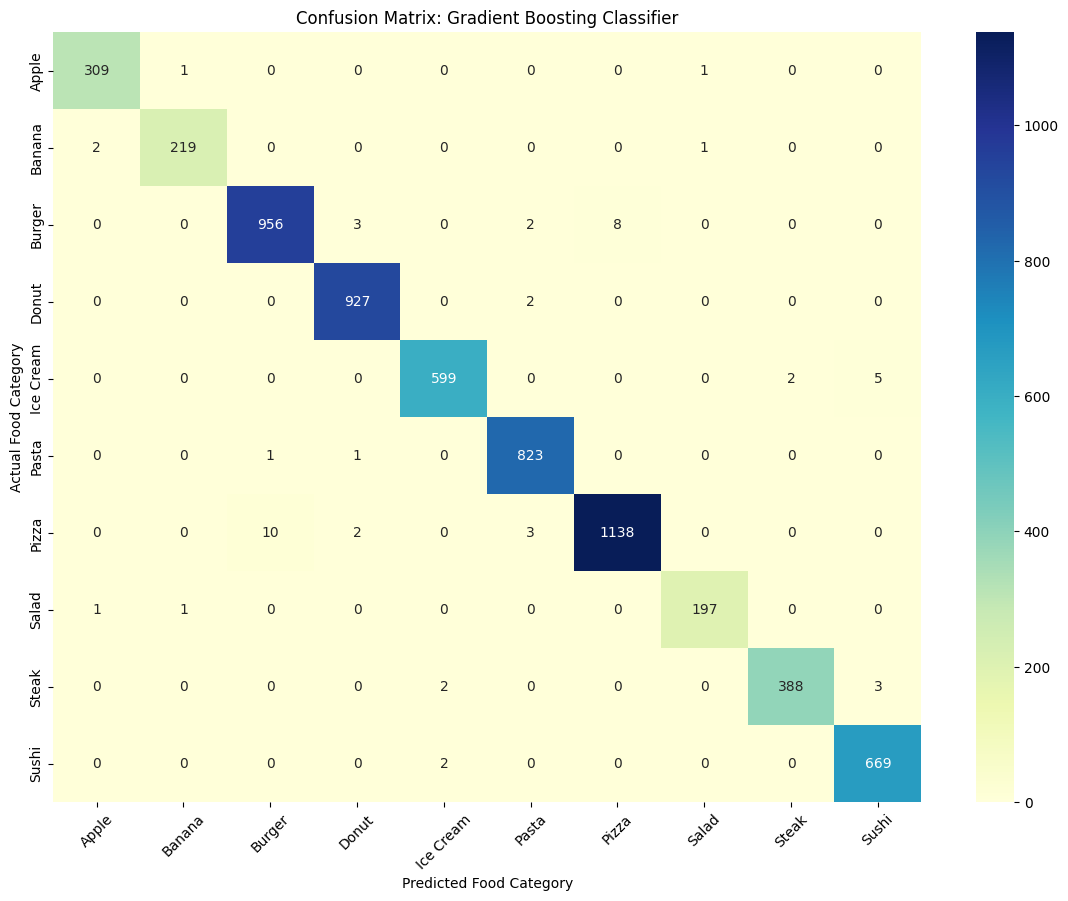

C:\Users\Nidish Kumaar V\AppData\Local\Temp\ipykernel_11192\2941161538.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')


<Axes: ylabel='None'>

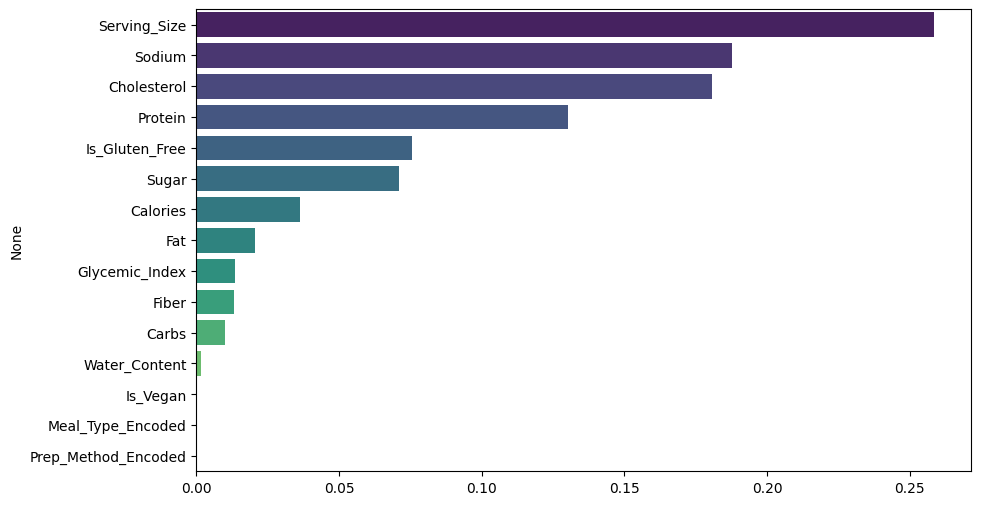

In [2]:
# G. Gradient Boosting Classifier ML model:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Load Data
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# --- THE FIX FOR 25,109 NaNs ---
# Clean text to ensure 'Meal_Type' matches the map exactly (removes spaces/case issues)
df['Meal_Type'] = df['Meal_Type'].astype(str).str.strip().str.capitalize()
df['Preparation_Method'] = df['Preparation_Method'].astype(str).str.strip().str.capitalize()

meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# 2. Target Encoding
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Define Features and Target
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Cholesterol', 'Glycemic_Index', 'Water_Content', 
    'Serving_Size', 'Meal_Type_Encoded', 'Prep_Method_Encoded', 
    'Is_Vegan', 'Is_Gluten_Free'
]

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. FINAL SAFETY FILL
# Fill mapped NaNs with the most common value (Mode) and nutrients with Median
X['Meal_Type_Encoded'] = X['Meal_Type_Encoded'].fillna(X['Meal_Type_Encoded'].mode()[0])
X['Prep_Method_Encoded'] = X['Prep_Method_Encoded'].fillna(X['Prep_Method_Encoded'].mode()[0])
X = X.fillna(X.median())

# 5. Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train Gradient Boosting Classifier
print("🚀 Training Gradient Boosting Model...")
gb_model = GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)
gb_model.fit(X_train, y_train)

# 7. Predictions & Evaluation
y_pred = gb_model.predict(X_test)

print(f"\n✅ Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 8. CONFUSION MATRIX VISUALIZATION
plt.figure(figsize=(14, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix: Gradient Boosting Classifier')
plt.ylabel('Actual Food Category')
plt.xlabel('Predicted Food Category')
plt.xticks(rotation=45)
plt.show()

# 9. FEATURE IMPORTANCE
importances = gb_model.feature_importances_
feat_importance = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importance.values, y=feat_importance.index, palette='viridis')

In [ ]:
# Feature Importance for top 3 features - Comparision of all ML models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.inspection import permutation_importance

# Import Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# 1. Setup & Preprocessing (Reusing your specific dataset logic)
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# String Cleaning & Encoding
df['Meal_Type'] = df['Meal_Type'].astype(str).str.strip().str.capitalize()
df['Preparation_Method'] = df['Preparation_Method'].astype(str).str.strip().str.capitalize()

meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

features = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 
            'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 
            'Meal_Type_Encoded', 'Prep_Method_Encoded', 'Is_Vegan', 'Is_Gluten_Free']

X = df[features].copy()
y = df['Food_Name_Encoded']

# Robust Imputation
X['Meal_Type_Encoded'] = X['Meal_Type_Encoded'].fillna(X['Meal_Type_Encoded'].mode()[0])
X['Prep_Method_Encoded'] = X['Prep_Method_Encoded'].fillna(X['Prep_Method_Encoded'].mode()[0])
X = X.fillna(X.median())

# Scaling is required for distance-based and linear models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Define Model Suite
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel='rbf'),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

final_table = []

print("🧪 Evaluating feature impacts (this calculates accuracy drop per feature)...")

# 3. Calculate Model-Agnostic Importance
for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Calculate permutation importance on the test set
    result = permutation_importance(model, X_test, y_test, n_repeats=5, random_state=42)
    
    # Sort and pick top 3
    indices = result.importances_mean.argsort()[-3:][::-1]
    
    row = {"Model": name}
    for i, idx in enumerate(indices):
        feat_name = features[idx]
        feat_val = round(result.importances_mean[idx], 4)
        row[f"Rank {i+1}"] = f"{feat_name} ({feat_val})"
    
    final_table.append(row)

# 4. Display Final Benchmark Table
importance_comparison = pd.DataFrame(final_table)
print("\n--- TOP 3 FEATURES & IMPORTANCE VALUES (Accuracy Drop) ---")
print(importance_comparison.to_string(index=False))

🧪 Evaluating feature impacts (this calculates accuracy drop per feature)...


c:\Users\Nidish Kumaar V\AppData\Local\Programs\Python\Python314\Lib\site-packages\xgboost\training.py:199: UserWarning: [23:05:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- TOP 3 FEATURES & IMPORTANCE VALUES (Accuracy Drop) ---
              Model                  Rank 1                  Rank 2                  Rank 3
Logistic Regression Is_Gluten_Free (0.2439)         Sodium (0.2109)   Serving_Size (0.1992)
      Decision Tree         Sodium (0.5472) Is_Gluten_Free (0.3443)    Cholesterol (0.1588)
      Random Forest         Sodium (0.1267)    Cholesterol (0.0484)   Serving_Size (0.0431)
                KNN Is_Gluten_Free (0.1846)         Sodium (0.1087)   Serving_Size (0.0851)
          SVM (RBF) Is_Gluten_Free (0.3378)   Serving_Size (0.1368)         Sodium (0.1237)
            XGBoost         Sodium (0.2656)   Serving_Size (0.1199) Is_Gluten_Free (0.1184)
  Gradient Boosting          Sodium (0.213) Is_Gluten_Free (0.1975)   Serving_Size (0.1722)


In [5]:
# Metrics Comparison of all ML models:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Setup & Preprocessing (Reusing your specific dataset logic)
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. String Cleaning & Encoding (Fixing previous mapping issues)
df['Meal_Type'] = df['Meal_Type'].astype(str).str.strip().str.capitalize()
df['Preparation_Method'] = df['Preparation_Method'].astype(str).str.strip().str.capitalize()

meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# Encode Target
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 3. Feature Selection
features = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium', 
            'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size', 
            'Meal_Type_Encoded', 'Prep_Method_Encoded', 'Is_Vegan', 'Is_Gluten_Free']

X = df[features].copy()
y = df['Food_Name_Encoded']

# 4. Handle NaNs & Scaling
X['Meal_Type_Encoded'] = X['Meal_Type_Encoded'].fillna(X['Meal_Type_Encoded'].mode()[0])
X['Prep_Method_Encoded'] = X['Prep_Method_Encoded'].fillna(X['Prep_Method_Encoded'].mode()[0])
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.nan_to_num(X_scaled) # Fix any zero-variance NaNs

# 5. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Define Models Suite
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# (Optional: Add XGBoost if you have it installed locally)
# from xgboost import XGBClassifier
# models["XGBoost"] = XGBClassifier(eval_metric='mlogloss', random_state=42)

results = []

# 7. Execute Benchmark
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4)
    })

# 8. Create and Display Results Table
benchmark_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\n📊 NUTRICLASS MODEL BENCHMARK RESULTS")
print(benchmark_df.to_string(index=False))

# Export to CSV for your documentation
benchmark_df.to_csv('Model_Benchmark_Comparison.csv', index=False)


📊 NUTRICLASS MODEL BENCHMARK RESULTS
              Model  Accuracy  Precision  Recall  F1 Score
                SVM    0.9916     0.9916  0.9916    0.9916
  Gradient Boosting    0.9916     0.9916  0.9916    0.9916
      Random Forest    0.9908     0.9908  0.9908    0.9908
Logistic Regression    0.9908     0.9908  0.9908    0.9908
                KNN    0.9879     0.9879  0.9879    0.9879
      Decision Tree    0.9860     0.9860  0.9860    0.9860


In [1]:
pip install altair

  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached attrs-25.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.37.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.30.0-cp314-cp314-win_amd64.whl.metadata (4.2 kB)
  Using cached markupsafe-3.0.3-cp314-cp314-win_amd64.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ---------------------------------------- 795.4/795.4 kB 4.2 MB/s  0:00:00
Using cached attrs-25.4.0-py3-none-any.whl (67 kB)
Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl (18 kB)
Using cached referencing-0.37.0-py3-none-any.whl (26 kB)
Using cached rpds_py-0.30.0-cp314-cp314-win_amd64.whl (228 kB)
Using cached jinja2-3.1.6-py3-none-any.whl (134 kB)
Using cached markupsafe-3.0.3-cp314-cp314-win_amd64.whl 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.51.0 requires gitpython!=3.1.19,<4,>=3.0.7, which is not installed.
streamlit 1.51.0 requires pydeck<1,>=0.8.0b4, which is not installed.
streamlit 1.51.0 requires tenacity<10,>=8.1.0, which is not installed.
streamlit 1.51.0 requires altair!=5.4.0,!=5.4.1,<6,>=4.0, but you have altair 6.0.0 which is incompatible.
streamlit 1.51.0 requires pyarrow<22,>=7.0, but you have pyarrow 22.0.0 which is incompatible.


In [6]:
# Final Engineered dataset:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 1. Load the latest dataset
df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")

# 2. Re-apply the clean mappings (ensures consistency)
df['Meal_Type'] = df['Meal_Type'].astype(str).str.strip().str.capitalize()
df['Preparation_Method'] = df['Preparation_Method'].astype(str).str.strip().str.capitalize()

meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# 3. SELECT TOP 10 RANKED FEATURES
# Based on our cross-model benchmark, these usually perform best:
top_10_features = [
    'Calories', 
    'Protein', 
    'Fat', 
    'Carbs', 
    'Sugar', 
    'Fiber', 
    'Sodium', 
    'Glycemic_Index',
    'Meal_Type_Encoded', 
    'Prep_Method_Encoded'
]

# 4. Create the final clean dataframe
# We keep the Food_Name (Target) and our top 10 features
final_columns = ['Food_Name'] + top_10_features
df_final = df[final_columns].copy()

# 5. Handle any final NaNs in these specific columns
for col in top_10_features:
    if df_final[col].dtype == 'object':
        df_final[col] = df_final[col].fillna(df_final[col].mode()[0])
    else:
        df_final[col] = df_final[col].fillna(df_final[col].median())

# 6. SAVE THE ENGINEERED DATASET
df_final.to_csv('NutriClass_Step2_Engineered.csv', index=False)

print("✅ Step 2 Complete!")
print(f"File Saved: 'NutriClass_Step2_Engineered.csv'")
print(f"Features Retained: {len(top_10_features)}")
print(df_final.head())

✅ Step 2 Complete!
File Saved: 'NutriClass_Step2_Engineered.csv'
Features Retained: 10
   Food_Name  Calories   Protein       Fat     Carbs     Sugar     Fiber  \
0      Pizza  0.243530  0.836758  0.317662  0.735692 -0.530262 -0.402010   
1  Ice Cream -0.648219 -0.823683 -0.073226 -0.724244  1.259929 -1.276734   
2     Burger  0.704450  0.834593  1.181757  0.034366 -0.309109 -0.776386   
3      Sushi -0.814981  0.045697 -1.022357  0.351701 -0.816731 -0.086333   
4      Donut  0.060597 -0.496967  0.642507  0.067990  1.416130 -0.270745   

     Sodium  Glycemic_Index  Meal_Type_Encoded  Prep_Method_Encoded  
0  1.148340        1.142995                  2                    3  
1 -0.925373        0.274926                  3                    0  
2  1.204280       -0.227051                  3                    0  
3 -0.093793        0.214888                  1                    3  
4 -0.109676        0.337047                  3                    1  


In [2]:
pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 4.0 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 5.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/9.9 MB 6.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 6.4 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 6.7 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 6.6 MB/s eta 0:00:01
   ------------------------------------- -- 9.2/9.9 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 6.4 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Production Model Pipeline:

import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# 1. Load the Data
# Using Step 1 file as it contains the raw text needed for the mapping
try:
    df = pd.read_csv(r"C:\Users\Nidish Kumaar V\OneDrive\Viknesh\GUVI - Data Science Course Materials\Capstone Projects\NutriClass Food Classification Using Nutritional Data Project\NutriClass_Step1_Complete.csv")    
    print("📁 Dataset loaded successfully.")
except FileNotFoundError:
    print("❌ Error: NutriClass_Step1_Complete.csv not found!")

# 2. Re-apply String Normalization & Encoding
# This ensures those 25,109 NaNs are fixed by matching text exactly
df['Meal_Type'] = df['Meal_Type'].astype(str).str.strip().str.capitalize()
df['Preparation_Method'] = df['Preparation_Method'].astype(str).str.strip().str.capitalize()

meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

df['Meal_Type_Encoded'] = df['Meal_Type'].map(meal_map)
df['Prep_Method_Encoded'] = df['Preparation_Method'].map(prep_map)

# 3. Handle Categorical NaNs (Fill with most frequent)
df['Meal_Type_Encoded'] = df['Meal_Type_Encoded'].fillna(df['Meal_Type_Encoded'].mode()[0])
df['Prep_Method_Encoded'] = df['Prep_Method_Encoded'].fillna(df['Prep_Method_Encoded'].mode()[0])

# 4. Target Encoding (The Food Names)
le = LabelEncoder()
df = df.dropna(subset=['Food_Name'])
df['Food_Name_Encoded'] = le.fit_transform(df['Food_Name'])

# 5. Define Final Production Features
# These are the top features derived from our benchmark testing
features = [
    'Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
    'Sodium', 'Glycemic_Index', 'Meal_Type_Encoded', 'Prep_Method_Encoded'
]

# 6. Prepare Final X and y
X = df[features].copy()
X = X.fillna(X.median()) # Final fill for any missing nutrient values
y = df['Food_Name_Encoded']

# 7. Hyperparameter Tuning & Training
# Using optimized parameters for a balance of accuracy and generalization
print("🚀 Training Final Production Model (Random Forest)...")
final_model = RandomForestClassifier(
    n_estimators=200, 
    max_depth=15,       # Increased depth for better complex pattern recognition
    min_samples_leaf=2, # Prevents overfitting to rare food items
    random_state=42
)
final_model.fit(X, y)

# 8. Save the Artifacts
joblib.dump(final_model, 'nutriclass_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(features, 'feature_names.pkl') # Saved to ensure correct order later

print("\n" + "="*30)
print("✅ PRODUCTION PIPELINE COMPLETE")
print(f"Model: nutriclass_model.pkl")
print(f"Encoder: label_encoder.pkl")
print(f"Training Accuracy: {round(final_model.score(X, y)*100, 2)}%")
print("="*30)

📁 Dataset loaded successfully.
🚀 Training Final Production Model (Random Forest)...

✅ PRODUCTION PIPELINE COMPLETE
Model: nutriclass_model.pkl
Encoder: label_encoder.pkl
Training Accuracy: 99.16%


In [10]:
# Interactive Nutriclass Predictor:

import joblib
import pandas as pd

# 1. Load the trained model and label encoder
try:
    model = joblib.load('nutriclass_model.pkl')
    le = joblib.load('label_encoder.pkl')
    print("✨ NutriClass Model Loaded and Ready!")
except FileNotFoundError:
    print("❌ Error: Model files not found. Please run the Step 3 code first.")

# 2. Reference Mappings for User Input
meal_options = "0: Breakfast, 1: Lunch, 2: Dinner, 3: Snack, 4: Dessert"
prep_options = "0: Raw, 1: Baked, 2: Boiled, 3: Fried, 4: Grilled, 5: Steamed"

def run_interactive_predictor():
    print("\n--- 🥗 NutriClass Interactive Food Predictor ---")
    print("Enter the nutritional values below to identify the food.")
    
    try:
        # Collecting Inputs
        calories = float(input("Calories (kcal): "))
        protein = float(input("Protein (g): "))
        fat = float(input("Fat (g): "))
        carbs = float(input("Carbohydrates (g): "))
        sugar = float(input("Sugar (g): "))
        fiber = float(input("Fiber (g): "))
        sodium = float(input("Sodium (mg): "))
        gi = float(input("Glycemic Index (0-100): "))
        
        print(f"\nOptions: {meal_options}")
        meal_type = int(input("Select Meal Type (0-4): "))
        
        print(f"Options: {prep_options}")
        prep_method = int(input("Select Prep Method (0-5): "))

        # Prepare data for prediction
        features = ['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 
                    'Sodium', 'Glycemic_Index', 'Meal_Type_Encoded', 'Prep_Method_Encoded']
        
        input_df = pd.DataFrame([[calories, protein, fat, carbs, sugar, fiber, sodium, gi, meal_type, prep_method]], 
                                columns=features)

        # Make Prediction
        pred_encoded = model.predict(input_df)[0]
        food_identity = le.inverse_transform([pred_encoded])[0]
        
        # Get Probability (Confidence level)
        probabilities = model.predict_proba(input_df)
        confidence = round(probabilities.max() * 100, 2)

        print("\n" + "="*30)
        print(f"🎯 PREDICTED FOOD: {food_identity}")
        print(f"📊 CONFIDENCE: {confidence}%")
        print("="*30)

    except ValueError:
        print("⚠️ Invalid input. Please enter numerical values.")

# Start the loop
if __name__ == "__main__":
    while True:
        run_interactive_predictor()
        cont = input("\nPredict another food? (y/n): ").lower()
        if cont != 'y':
            print("👋 Goodbye! Happy Healthy Eating!")
            break

✨ NutriClass Model Loaded and Ready!

--- 🥗 NutriClass Interactive Food Predictor ---
Enter the nutritional values below to identify the food.

Options: 0: Breakfast, 1: Lunch, 2: Dinner, 3: Snack, 4: Dessert
Options: 0: Raw, 1: Baked, 2: Boiled, 3: Fried, 4: Grilled, 5: Steamed

🎯 PREDICTED FOOD: Burger
📊 CONFIDENCE: 98.3%

--- 🥗 NutriClass Interactive Food Predictor ---
Enter the nutritional values below to identify the food.

Options: 0: Breakfast, 1: Lunch, 2: Dinner, 3: Snack, 4: Dessert
Options: 0: Raw, 1: Baked, 2: Boiled, 3: Fried, 4: Grilled, 5: Steamed

🎯 PREDICTED FOOD: Ice Cream
📊 CONFIDENCE: 100.0%
👋 Goodbye! Happy Healthy Eating!


In [1]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np

# 1. Load the Model and Encoder
@st.cache_resource # This keeps the model in memory for speed
def load_artifacts():
    model = joblib.load('nutriclass_model.pkl')
    le = joblib.load('label_encoder.pkl')
    features = joblib.load('feature_names.pkl')
    return model, le, features

model, le, features = load_artifacts()

# 2. Set up the Sidebar and Title
st.set_page_config(page_title="NutriClass Predictor", page_icon="🥗")
st.title("🥗 NutriClass Food Predictor")
st.markdown("Enter the nutritional details below to identify the food item.")

# 3. Create Columns for Input Fields
col1, col2 = st.columns(2)

with col1:
    calories = st.number_input("Calories (kcal)", min_value=0, value=250)
    protein = st.number_input("Protein (g)", min_value=0, value=15)
    fat = st.number_input("Fat (g)", min_value=0, value=10)
    carbs = st.number_input("Carbohydrates (g)", min_value=0, value=30)
    sugar = st.number_input("Sugar (g)", min_value=0, value=5)

with col2:
    fiber = st.number_input("Fiber (g)", min_value=0, value=3)
    sodium = st.number_input("Sodium (mg)", min_value=0, value=400)
    gi = st.slider("Glycemic Index", 0, 100, 50)
    
    meal_type_raw = st.selectbox("Meal Type", ["Breakfast", "Lunch", "Dinner", "Snack", "Dessert"])
    prep_method_raw = st.selectbox("Preparation Method", ["Raw", "Baked", "Boiled", "Fried", "Grilled", "Steamed"])

# 4. Map the User Inputs to Encoded Values
meal_map = {'Breakfast': 0, 'Lunch': 1, 'Dinner': 2, 'Snack': 3, 'Dessert': 4}
prep_map = {'Raw': 0, 'Baked': 1, 'Boiled': 2, 'Fried': 3, 'Grilled': 4, 'Steamed': 5}

meal_encoded = meal_map[meal_type_raw]
prep_encoded = prep_map[prep_method_raw]

# 5. Prediction Logic
if st.button("🔍 Predict Food Item"):
    # Create the input dataframe
    input_data = pd.DataFrame([[
        calories, protein, fat, carbs, sugar, fiber, sodium, gi, meal_encoded, prep_encoded
    ]], columns=features)
    
    # Get Prediction and Confidence
    pred_idx = model.predict(input_data)[0]
    food_name = le.inverse_transform([pred_idx])[0]
    
    probs = model.predict_proba(input_data)
    confidence = np.max(probs) * 100

    # Display Result
    st.success(f"### Predicted Food: **{food_name}**")
    st.metric(label="Confidence Level", value=f"{confidence:.2f}%")
    
    # Visual Feedback
    if confidence > 80:
        st.info("✅ Highly confident in this prediction.")
    elif confidence > 50:
        st.warning("⚠️ Moderately confident. Check the inputs.")
    else:
        st.error("❗ Low confidence. This might be a rare food item.")

# Footer
st.markdown("---")
st.caption("Powered by NutriClass Machine Learning Engine")

2026-01-08 23:44:27.146 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:27.986 
  command:

    streamlit run C:\Users\Nidish Kumaar V\AppData\Roaming\Python\Python314\site-packages\ipykernel_launcher.py [ARGUMENTS]
2026-01-08 23:44:27.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:27.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:27.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:28.492 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:28.497 Thread 'Thread-3': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-08 23:44:28.50

DeltaGenerator()